In [1]:
# # basic import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('customer_churn_dataset-training-master.csv')

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [4]:
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [5]:
df[df.isnull().any(axis=1)] # null value of  199295 index we can simply drop this recoed from dataset

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [8]:
df.dtypes

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [9]:
df.shape

(440832, 12)

In [10]:
df['Churn'].value_counts()

1.0    249999
0.0    190833
Name: Churn, dtype: int64

In [11]:
df.drop('CustomerID',axis=1,inplace=True)

In [12]:
X = df.iloc[:,:-1].values# all row ,all collumn except last collumn
y = df.iloc[:,-1].values # all row lasr collumn

In [13]:
X.shape

(440832, 10)

In [14]:
print(X[:,1])# reading first collumn 

['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']


In [15]:
cat_var = ['Gender','Subscription Type','Contract Length']

# Encoding a categorical data

**Label Encoding**:-

is a technique used to convert categorical variables into numerical labels. It assigns a unique numerical value to each category in the variable. Label encoding is useful when the categorical variable has an inherent order or hierarchy. For example, if we have a variable representing education levels (e.g., "High School," "Bachelor's Degree," "Master's Degree"), label encoding can be used to assign numerical labels (e.g., 0, 1, 2) based on the order of education levels.

**One-Hot Encoding:**:-

is a technique used to create binary features for each category in a categorical variable. It creates new binary columns, where each column represents a category and indicates whether the original variable belongs to that category or not. One-hot encoding is useful when the categorical variable does not have an inherent order or hierarchy. For example, if we have a variable representing colors (e.g., "Red," "Blue," "Green"), one-hot encoding can be used to create binary columns for each color (e.g., "IsRed," "IsBlue," "IsGreen").

In [16]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label_encoder = LabelEncoder()


X[:,6] = label_encoder.fit_transform(X[:,6])# ordinal data
X[:,7] = label_encoder.fit_transform(X[:,7])#ordinal data
X[:,1] = label_encoder.fit_transform(X[:,1])# nominal data 

In [17]:
X

array([[30.0, 0, 39.0, ..., 0, 932.0, 17.0],
       [65.0, 0, 49.0, ..., 1, 557.0, 6.0],
       [55.0, 0, 14.0, ..., 2, 185.0, 3.0],
       ...,
       [26.0, 1, 35.0, ..., 2, 977.31, 9.0],
       [28.0, 1, 55.0, ..., 2, 602.55, 2.0],
       [31.0, 1, 48.0, ..., 2, 567.77, 21.0]], dtype=object)

In [18]:
# handling nan value
#from sklearn.impute  import SimpleImputer
#imputer = SimpleImputer(strategy='mean')
#X = imputer.fit_transform(X)

In [19]:
## do train train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
len(X_train)

352665

In [21]:
len(X_test)

88167

In [22]:
X_train[0]

array([24.0, 1, 58.0, 28.0, 0.0, 4.0, 0, 0, 665.22, 29.0], dtype=object)

# Feature scalling

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# scalled 
X_train[0]

array([-1.23471814,  0.87230805,  1.55009444,  1.41934063, -1.17330131,
       -1.08616346, -1.24477229, -1.11614171,  0.13963853,  1.68975907])

In [25]:
# Feature engneering is not performed

In [26]:
## Builfing model

# DecisionTreeClassifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
y_pred = clf.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
accuracy_score(y_test,y_pred)*100

[[38059     4]
 [   12 50092]]


99.981852620595

<AxesSubplot: >

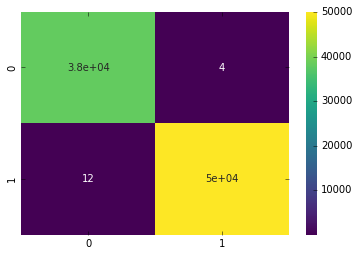

In [30]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='viridis')

# RandomForestClassifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)


RandomForestClassifier()

In [32]:
y_pred = clf.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
accuracy_score(y_test,y_pred)*100

[[38061     2]
 [   18 50086]]


99.97731577574376

# knn

In [34]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train,y_train)


KNeighborsClassifier()

In [35]:
print(confusion_matrix(y_test,y_pred))
accuracy_score(y_test,y_pred)*100

[[38061     2]
 [   18 50086]]


99.97731577574376

# GaussianNB

In [36]:
from sklearn.naive_bayes import GaussianNB
clf =GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [37]:
print(confusion_matrix(y_test,y_pred))
accuracy_score(y_test,y_pred)*100

[[38061     2]
 [   18 50086]]


99.97731577574376

In [ ]:
# selected model Random forest 
# predictions
# note rerum again  ranfom forest model then  rum below  codes

In [40]:
X_new = [[30.0, 1, 60.0, 25.0, 0.0, 4.0, 0, 0, 670.22, 35]]
scalledX_new= scaler.transform(X_new)

In [42]:
predict_new_entry =clf.predict(scalledX_new )

In [43]:
if predict_new_entry==1:
    print('The custumer is more likely to be churned')
else:
    print('The custumer is likely to stay')

The custumer is likely to stay
